# Project 10 - Quality Prediction in a Mining Process

Context

It is not always easy to find databases from real world manufacturing plants, specially mining plants. This database comes from one of the most important parts of a mining process: a flotation plant. The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

Problem Statements:

• Is it possible to predict % Silica Concentrate every minute?

•	How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigating the % of iron that could have gone to tailings. 


•	Is it possible to predict % Silica in Concentrate without using % Iron Concentrate column (as they are highly correlated)? 


# Importing Libraries for Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Prepration and Analysis

In [2]:
df = pd.read_csv('quality_pred.csv', decimal=',', parse_dates=['date'], infer_datetime_format=True)
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [4]:
df.shape

(737453, 24)

In our dataframe their are '737453' rows and '24' columns

In [5]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [6]:
df.isnull()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().count()

date                            737453
% Iron Feed                     737453
% Silica Feed                   737453
Starch Flow                     737453
Amina Flow                      737453
Ore Pulp Flow                   737453
Ore Pulp pH                     737453
Ore Pulp Density                737453
Flotation Column 01 Air Flow    737453
Flotation Column 02 Air Flow    737453
Flotation Column 03 Air Flow    737453
Flotation Column 04 Air Flow    737453
Flotation Column 05 Air Flow    737453
Flotation Column 06 Air Flow    737453
Flotation Column 07 Air Flow    737453
Flotation Column 01 Level       737453
Flotation Column 02 Level       737453
Flotation Column 03 Level       737453
Flotation Column 04 Level       737453
Flotation Column 05 Level       737453
Flotation Column 06 Level       737453
Flotation Column 07 Level       737453
% Iron Concentrate              737453
% Silica Concentrate            737453
dtype: int64

Their is no null or empty/missing data in our dataframe

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'% Iron Feed'}>,
        <AxesSubplot:title={'center':'% Silica Feed'}>,
        <AxesSubplot:title={'center':'Starch Flow'}>,
        <AxesSubplot:title={'center':'Amina Flow'}>],
       [<AxesSubplot:title={'center':'Ore Pulp Flow'}>,
        <AxesSubplot:title={'center':'Ore Pulp pH'}>,
        <AxesSubplot:title={'center':'Ore Pulp Density'}>,
        <AxesSubplot:title={'center':'Flotation Column 01 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 02 Air Flow'}>],
       [<AxesSubplot:title={'center':'Flotation Column 03 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 04 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 05 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 06 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 07 Air Flow'}>],
       [<AxesSubplot:title={'center':'Flotation Column 01 Level'}>,

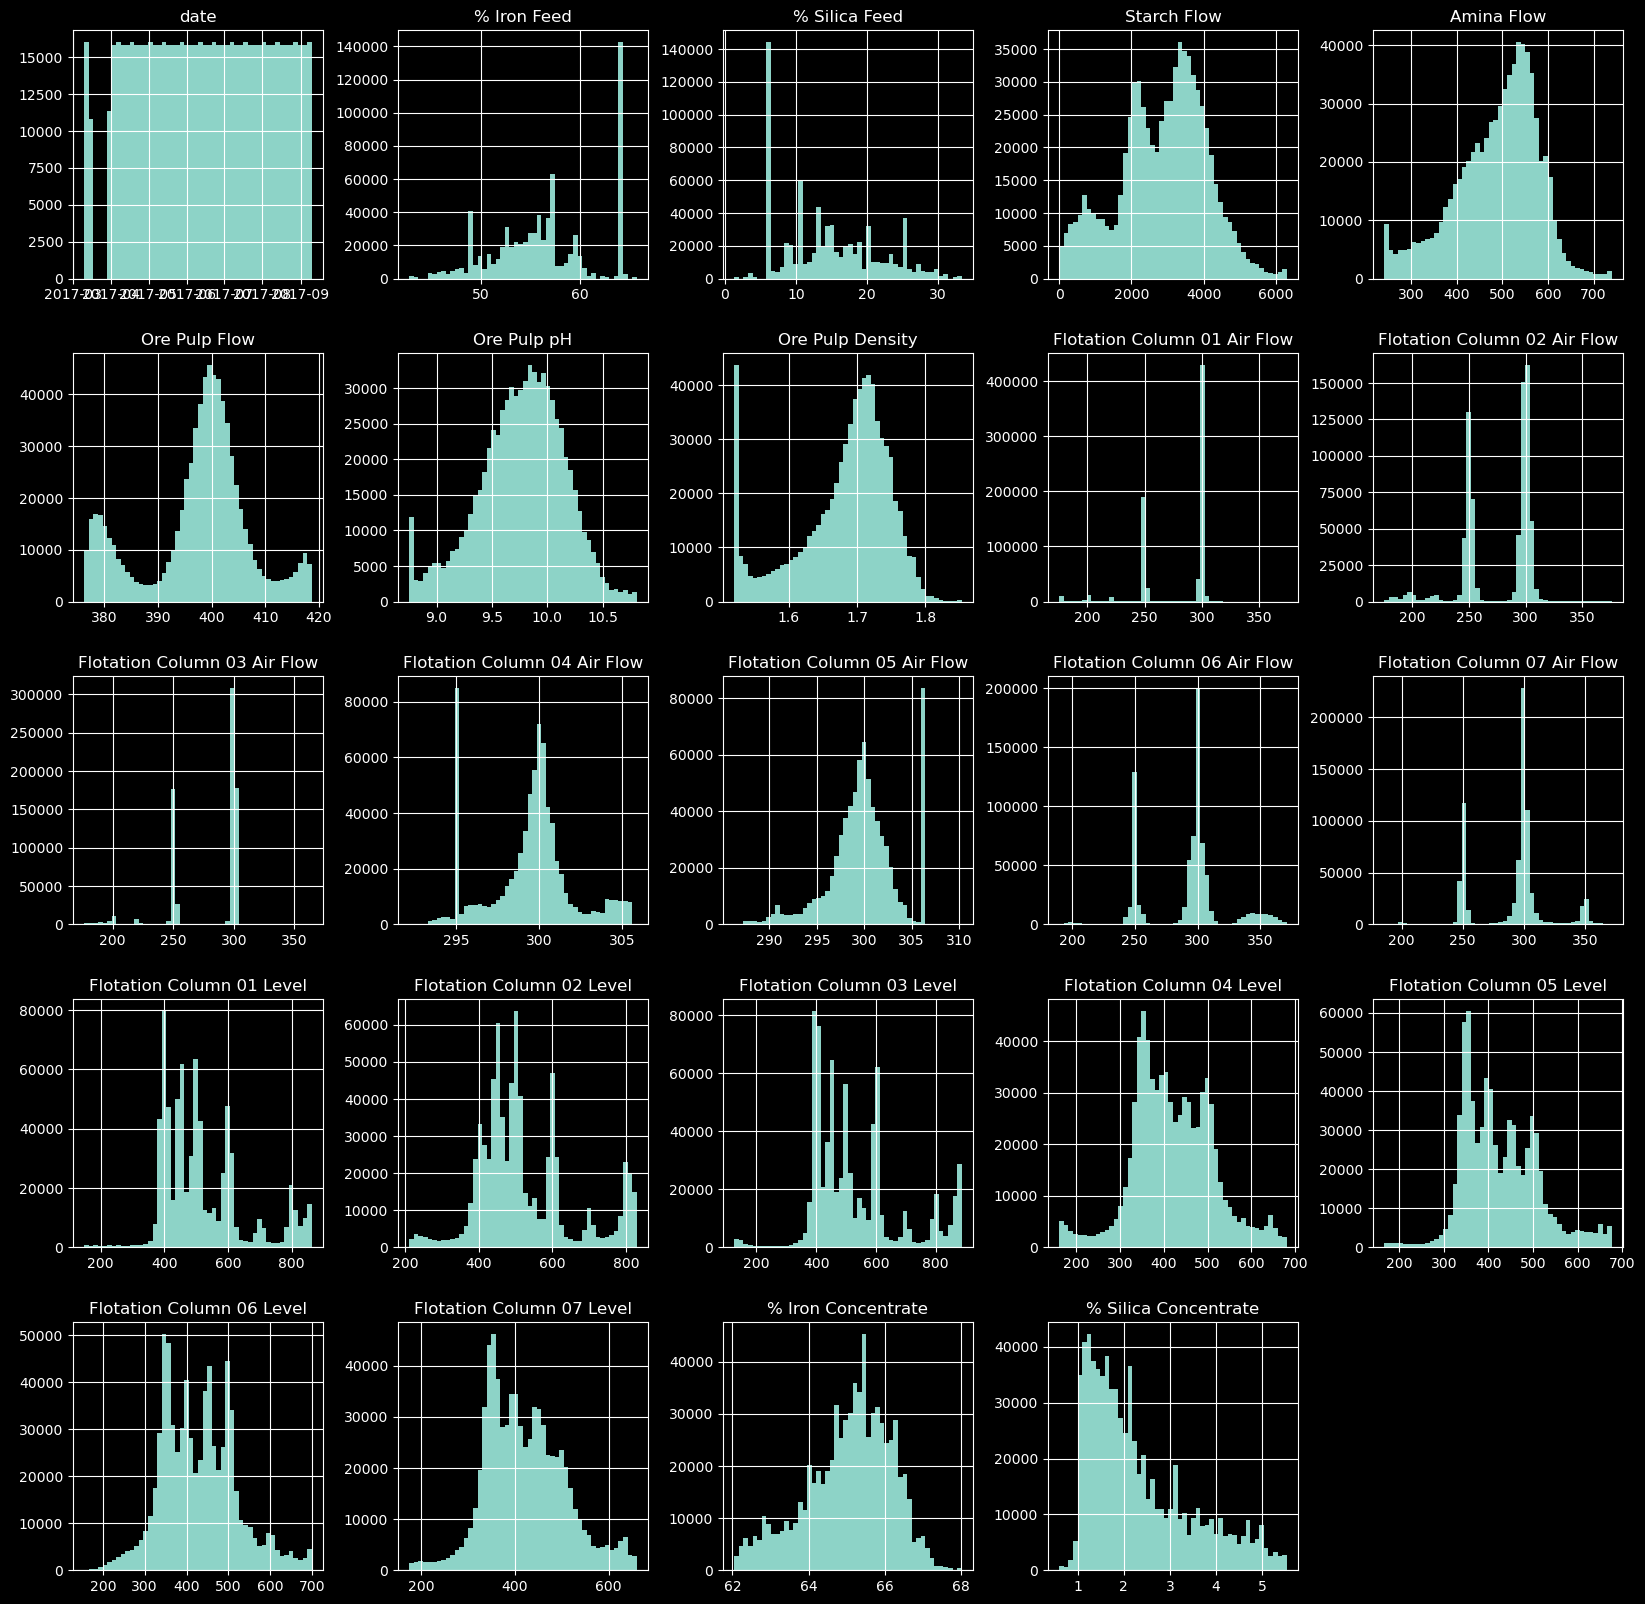

In [8]:
plt.style.use(['dark_background'])
df.hist(bins=50, figsize=(20,20))

Target Variable: %Silica Concentrate

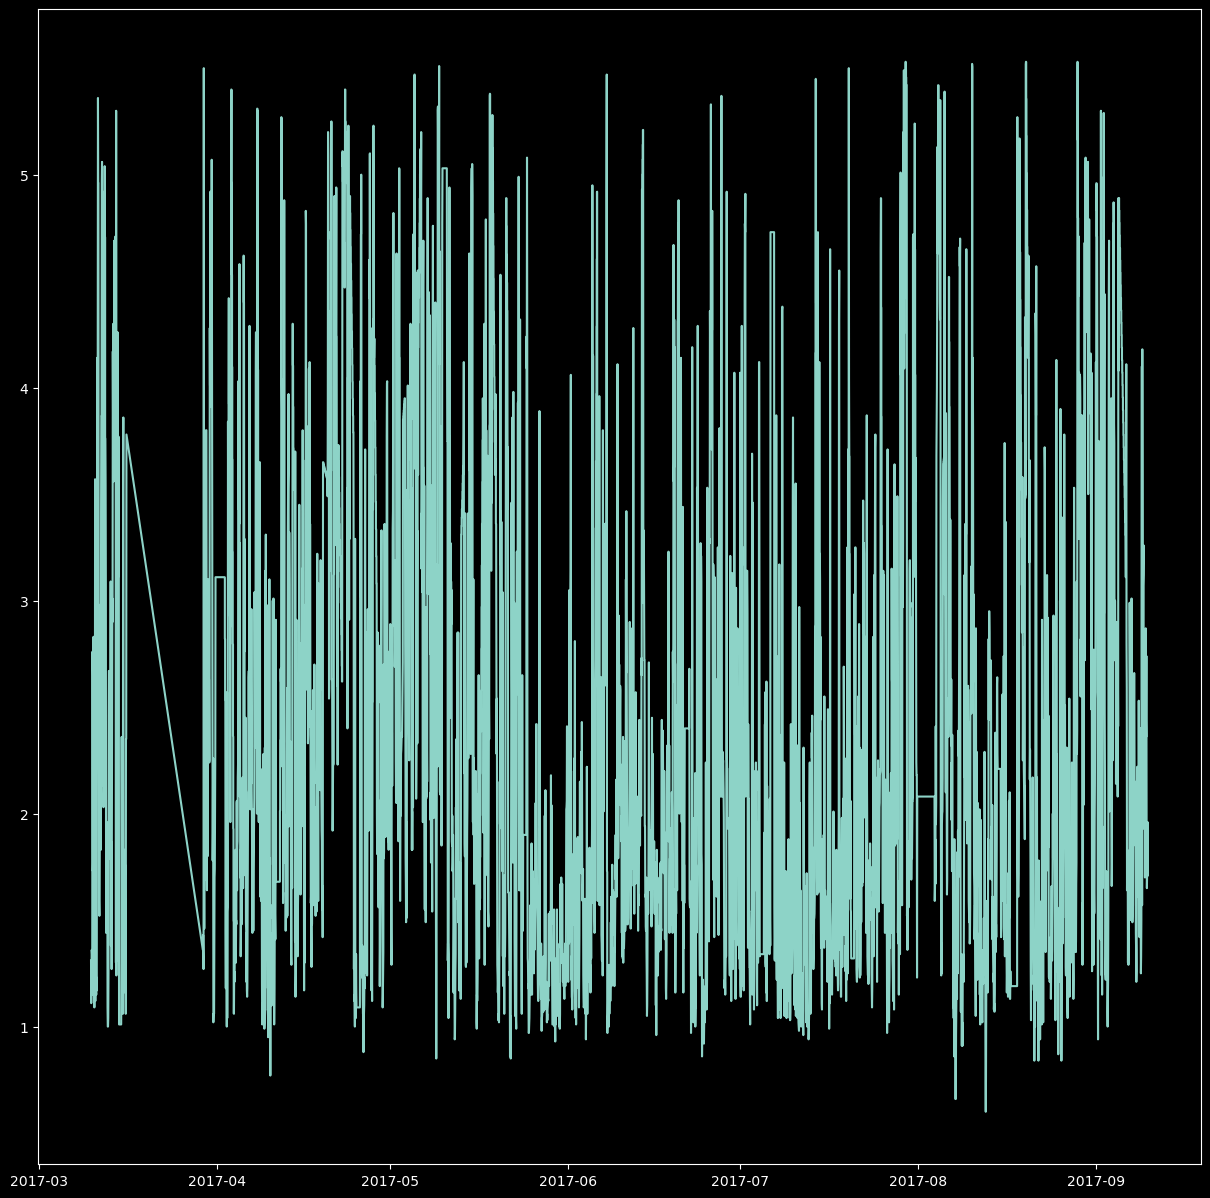

In [9]:
#Let's plot the target variable vs date
plt.figure(figsize=(15,15))
plt.plot(df['date'],df['% Silica Concentrate'])

Problem Statement 1: Is it possible to predict % Silica Concentrate every minute?

# Resampling the Data

Let's try to analyze that is it possible to predict %Silica Concentrate every minute.

In [10]:
df['Date_Time'] = pd.to_datetime(df['date'])
df.index = df['Date_Time']
df = df.resample('1T').mean()
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.38331,450.532747,66.91,1.31
2017-03-10 01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-10 01:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-10 01:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-10 01:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264841 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Freq: T
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   4097 non-null   float64
 1   % Silica Feed                 4097 non-null   float64
 2   Starch Flow                   4097 non-null   float64
 3   Amina Flow                    4097 non-null   float64
 4   Ore Pulp Flow                 4097 non-null   float64
 5   Ore Pulp pH                   4097 non-null   float64
 6   Ore Pulp Density              4097 non-null   float64
 7   Flotation Column 01 Air Flow  4097 non-null   float64
 8   Flotation Column 02 Air Flow  4097 non-null   float64
 9   Flotation Column 03 Air Flow  4097 non-null   float64
 10  Flotation Column 04 Air Flow  4097 non-null   float64
 11  Flotation Column 05 Air Flow  4097 non-null   float64
 12  Flotation Column

In [12]:
df.isnull()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-03-10 01:01:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2017-03-10 01:02:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2017-03-10 01:03:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2017-03-10 01:04:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 22:56:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2017-09-09 22:57:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2017-09-09 22:58:00,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


As we observe that if we going to predict %Silica Concentrate every minute, then most of the data in dataframe is found to be NaN or null and it will cause to our prediction and also increase the size of the data in dataframe.

Hence, It is not possible to predict % Silica Concentrate every minute.

In [13]:
# Now if it is not possible to predict %Silica Concentrate every min. then we will use every 'Hours'
# to do this problem.
df = df.resample('H').mean()
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,250.178287,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
2017-03-10 02:00:00,55.2,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,250.033317,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2017-03-10 03:00:00,55.2,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,250.046350,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
2017-03-10 04:00:00,55.2,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,250.120861,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
2017-03-10 05:00:00,55.2,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,250.013500,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34


In [14]:
df.shape

(4415, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4415 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Freq: H
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   4097 non-null   float64
 1   % Silica Feed                 4097 non-null   float64
 2   Starch Flow                   4097 non-null   float64
 3   Amina Flow                    4097 non-null   float64
 4   Ore Pulp Flow                 4097 non-null   float64
 5   Ore Pulp pH                   4097 non-null   float64
 6   Ore Pulp Density              4097 non-null   float64
 7   Flotation Column 01 Air Flow  4097 non-null   float64
 8   Flotation Column 02 Air Flow  4097 non-null   float64
 9   Flotation Column 03 Air Flow  4097 non-null   float64
 10  Flotation Column 04 Air Flow  4097 non-null   float64
 11  Flotation Column 05 Air Flow  4097 non-null   float64
 12  Flotation Column 0

Now, As we observe that if we use mean of every hours to predict the % Silica Concentrate then it is possible.
And size of the dataframe is also decreased.

Hence, It is possible to predict % Silica Concentrate every hour.

In [16]:
#Now, as we observe in info() that some of the rows has empty value. So, we are going to replace it by
#NaN and drop it. Then, we got our dataframe with proper data without any missing values.

df = df.replace('',np.nan)
df.loc[df.isna().any(axis=1)]

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-03-16 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-16 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-16 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-16 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-16 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-29 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-29 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-29 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, As we see that their are 318 rows which don't contain any value. Now, we drop all these rows from our dataframe.

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4097 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   4097 non-null   float64
 1   % Silica Feed                 4097 non-null   float64
 2   Starch Flow                   4097 non-null   float64
 3   Amina Flow                    4097 non-null   float64
 4   Ore Pulp Flow                 4097 non-null   float64
 5   Ore Pulp pH                   4097 non-null   float64
 6   Ore Pulp Density              4097 non-null   float64
 7   Flotation Column 01 Air Flow  4097 non-null   float64
 8   Flotation Column 02 Air Flow  4097 non-null   float64
 9   Flotation Column 03 Air Flow  4097 non-null   float64
 10  Flotation Column 04 Air Flow  4097 non-null   float64
 11  Flotation Column 05 Air Flow  4097 non-null   float64
 12  Flotation Column 06 Air Fl

Now, we have only those rows which contain values and all missing values is droped.

# Identifying Outliers in the Dataframe

The best way to find the outliers in the dataframe is visulaize it in boxplot.

Boxplot: A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

<AxesSubplot:>

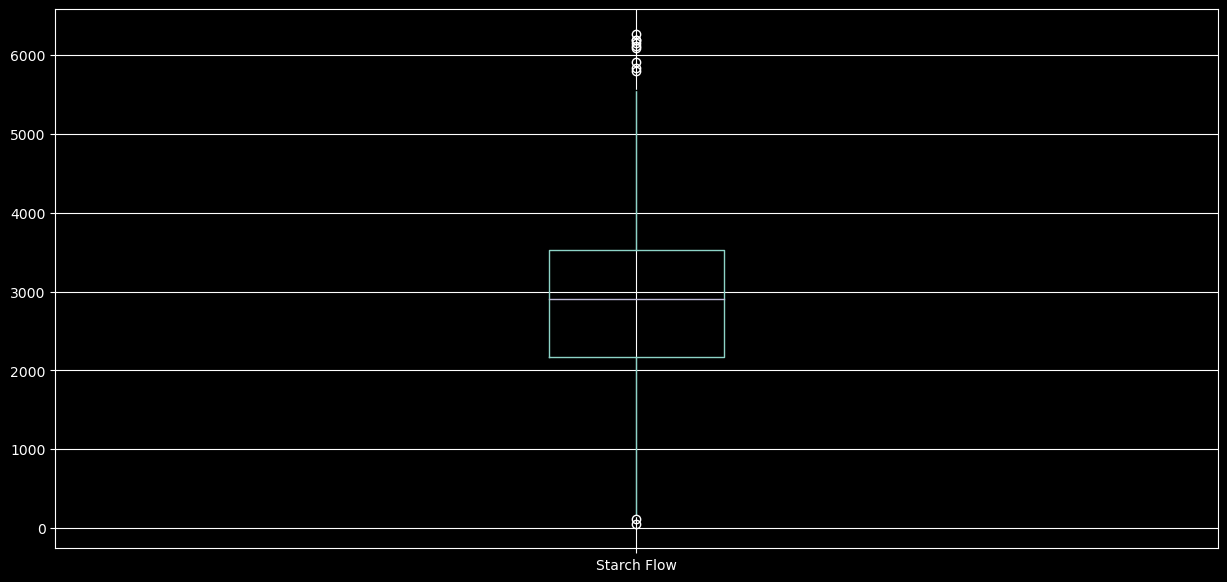

In [19]:
df.boxplot(column='Starch Flow',grid=True,figsize=(15,7))

<AxesSubplot:>

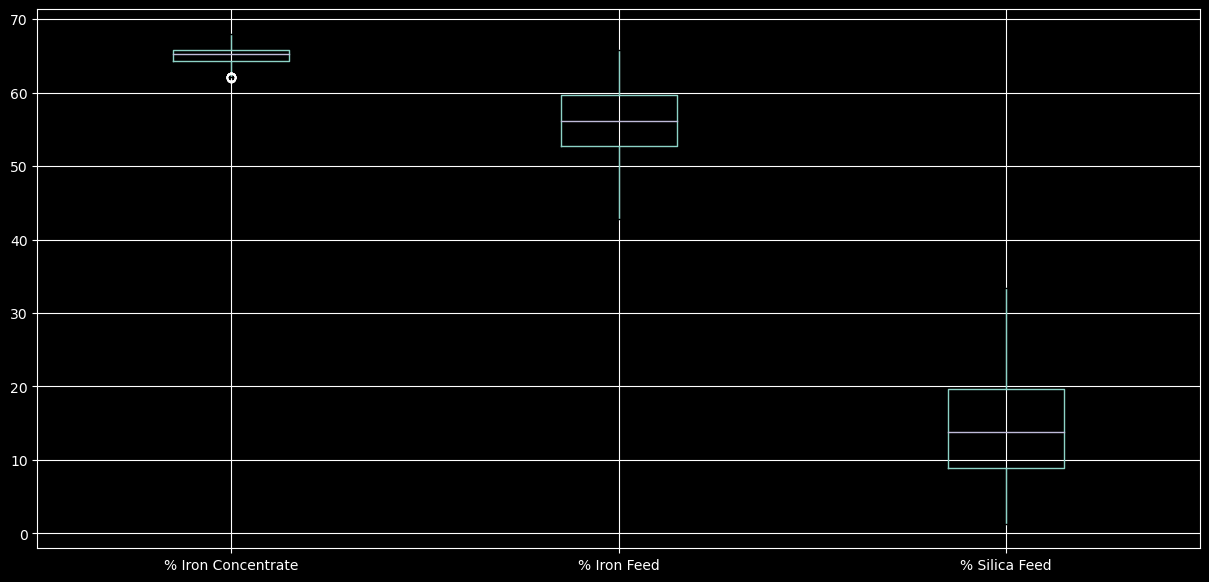

In [20]:
df.boxplot(column=['% Iron Concentrate','% Iron Feed','% Silica Feed'],grid=True,figsize=(15,7))

<AxesSubplot:>

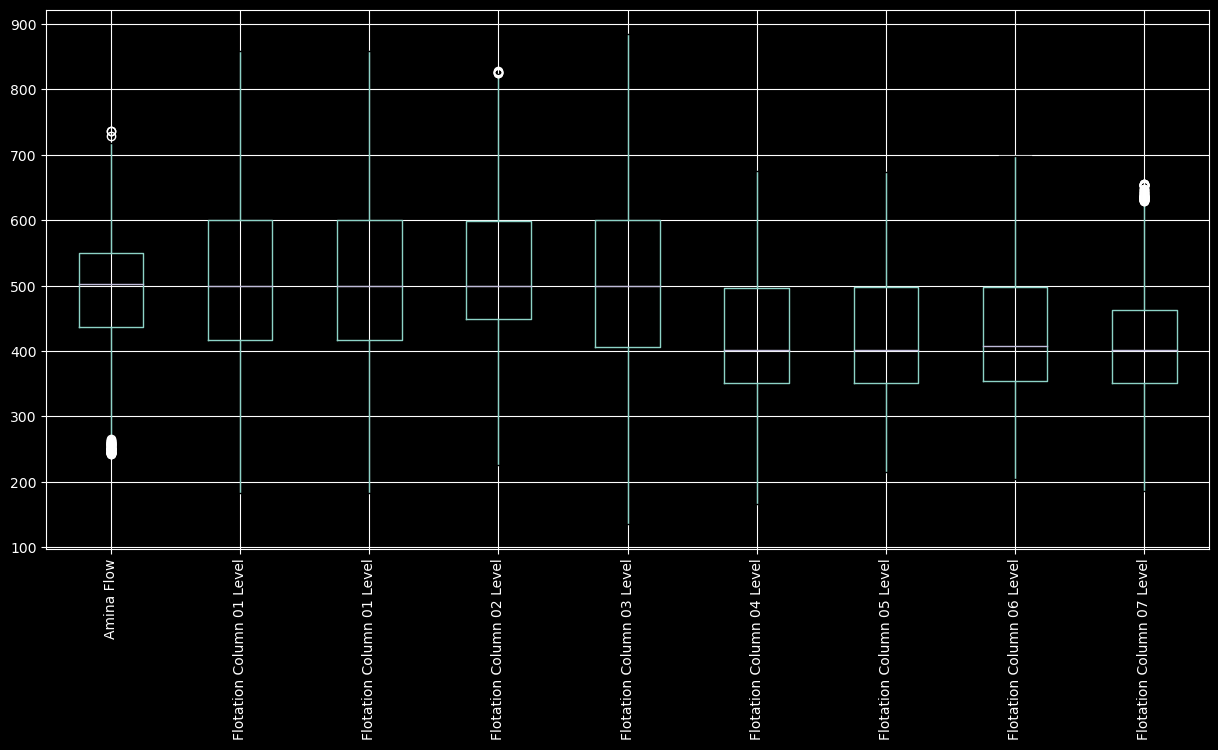

In [21]:
df.boxplot(column=['Amina Flow','Flotation Column 01 Level','Flotation Column 01 Level',
                  'Flotation Column 02 Level','Flotation Column 03 Level',
                  'Flotation Column 04 Level','Flotation Column 05 Level',
                  'Flotation Column 06 Level','Flotation Column 07 Level'],grid=True,figsize=(15,7),
          rot=90)

<AxesSubplot:>

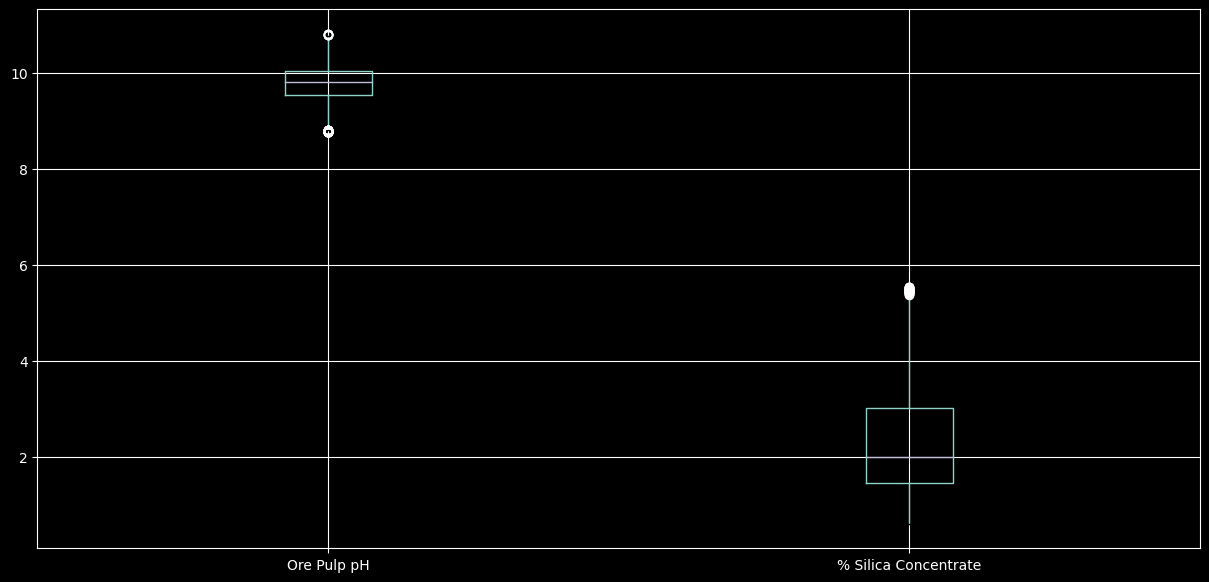

In [22]:
df.boxplot(column=['Ore Pulp pH','% Silica Concentrate'],grid=True,figsize=(15,7))

<AxesSubplot:>

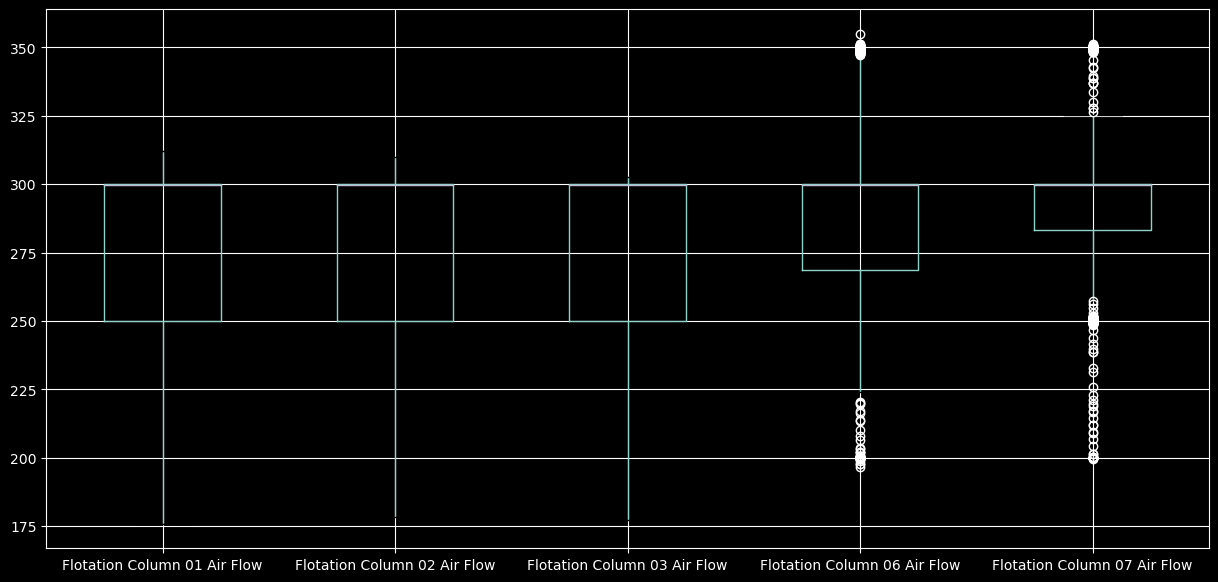

In [23]:
df.boxplot(column=['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow',
                  'Flotation Column 03 Air Flow','Flotation Column 06 Air Flow',
                  'Flotation Column 07 Air Flow'],grid=True,figsize=(15,7))

<AxesSubplot:>

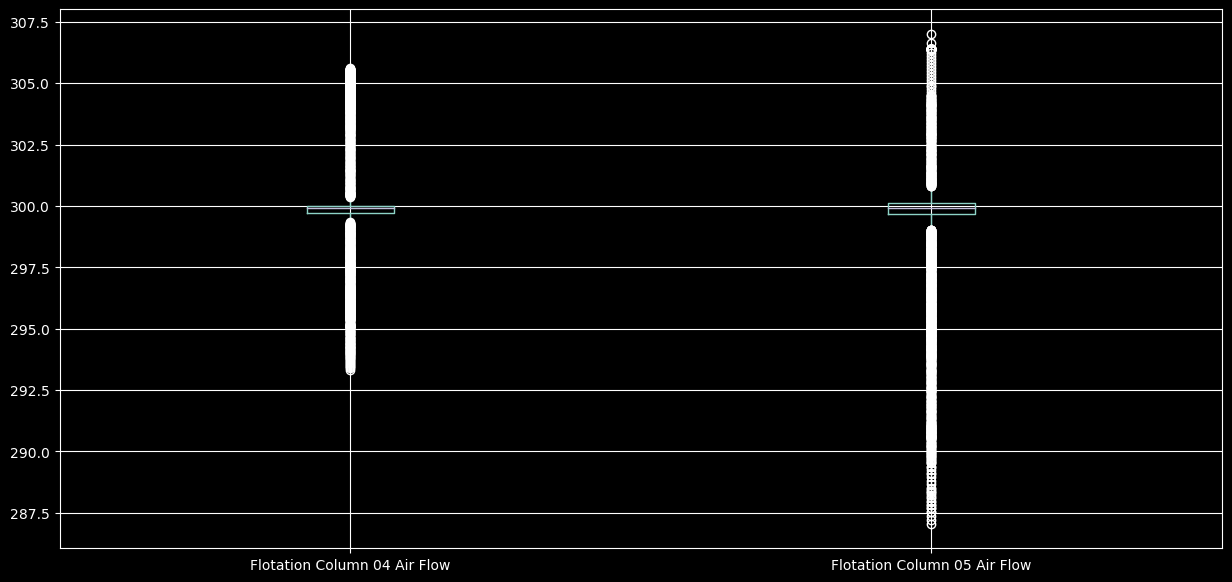

In [24]:
df.boxplot(column=['Flotation Column 04 Air Flow','Flotation Column 05 Air Flow'],grid=True,figsize=(15,7))

<AxesSubplot:>

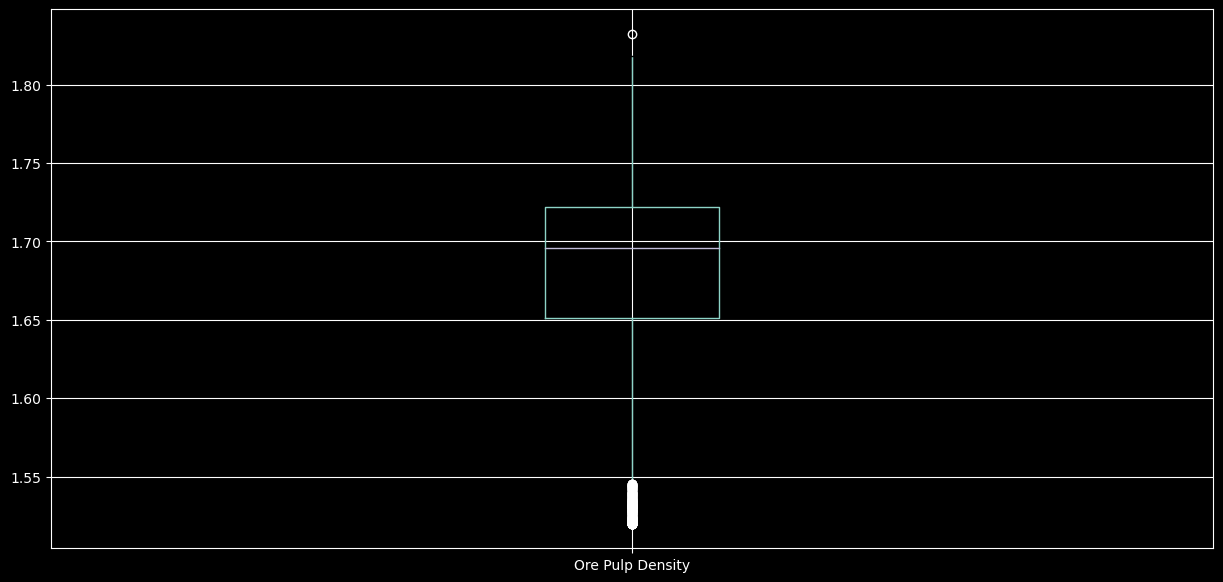

In [25]:
df.boxplot(column='Ore Pulp Density',grid=True,figsize=(15,7))

<AxesSubplot:>

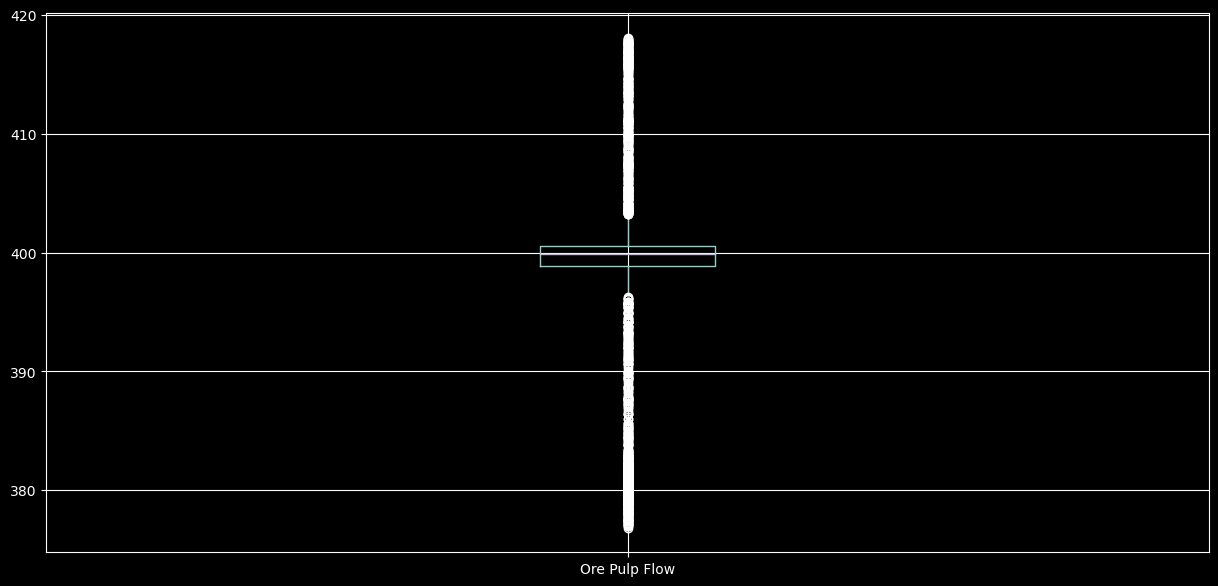

In [26]:
df.boxplot(column='Ore Pulp Flow',grid=True,figsize=(15,7))

# Remove Outliers

So, As we observe lot's of outliers in above boxplots. Let's remove all of those outliers for better prediction Machine Learning Model.

IQR Method to remove outliers:

The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR. IQR = Q3 - Q1. To detect the outliers using this method, we define a new range, let's call it decision range, and any data point lying outside this range is considered as outlier and is accordingly dealt with.

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [28]:
df_ol = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df = df_ol
df.shape

(1817, 23)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1817 entries, 2017-04-24 00:00:00 to 2017-09-08 15:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   1817 non-null   float64
 1   % Silica Feed                 1817 non-null   float64
 2   Starch Flow                   1817 non-null   float64
 3   Amina Flow                    1817 non-null   float64
 4   Ore Pulp Flow                 1817 non-null   float64
 5   Ore Pulp pH                   1817 non-null   float64
 6   Ore Pulp Density              1817 non-null   float64
 7   Flotation Column 01 Air Flow  1817 non-null   float64
 8   Flotation Column 02 Air Flow  1817 non-null   float64
 9   Flotation Column 03 Air Flow  1817 non-null   float64
 10  Flotation Column 04 Air Flow  1817 non-null   float64
 11  Flotation Column 05 Air Flow  1817 non-null   float64
 12  Flotation Column 06 Air Fl

So, All the outliers are removed from the dataframe and data is also reduced for the better prediction model.

Now, Let's compare the graphical representaions/plots of previous dataframe(without resampling and outliers removal) vs new dataframe (with resampling and outliers removal).

array([[<AxesSubplot:title={'center':'% Iron Feed'}>,
        <AxesSubplot:title={'center':'% Silica Feed'}>,
        <AxesSubplot:title={'center':'Starch Flow'}>,
        <AxesSubplot:title={'center':'Amina Flow'}>,
        <AxesSubplot:title={'center':'Ore Pulp Flow'}>],
       [<AxesSubplot:title={'center':'Ore Pulp pH'}>,
        <AxesSubplot:title={'center':'Ore Pulp Density'}>,
        <AxesSubplot:title={'center':'Flotation Column 01 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 02 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 03 Air Flow'}>],
       [<AxesSubplot:title={'center':'Flotation Column 04 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 05 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 06 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 07 Air Flow'}>,
        <AxesSubplot:title={'center':'Flotation Column 01 Level'}>],
       [<AxesSubplot:title={'center':'Flotatio

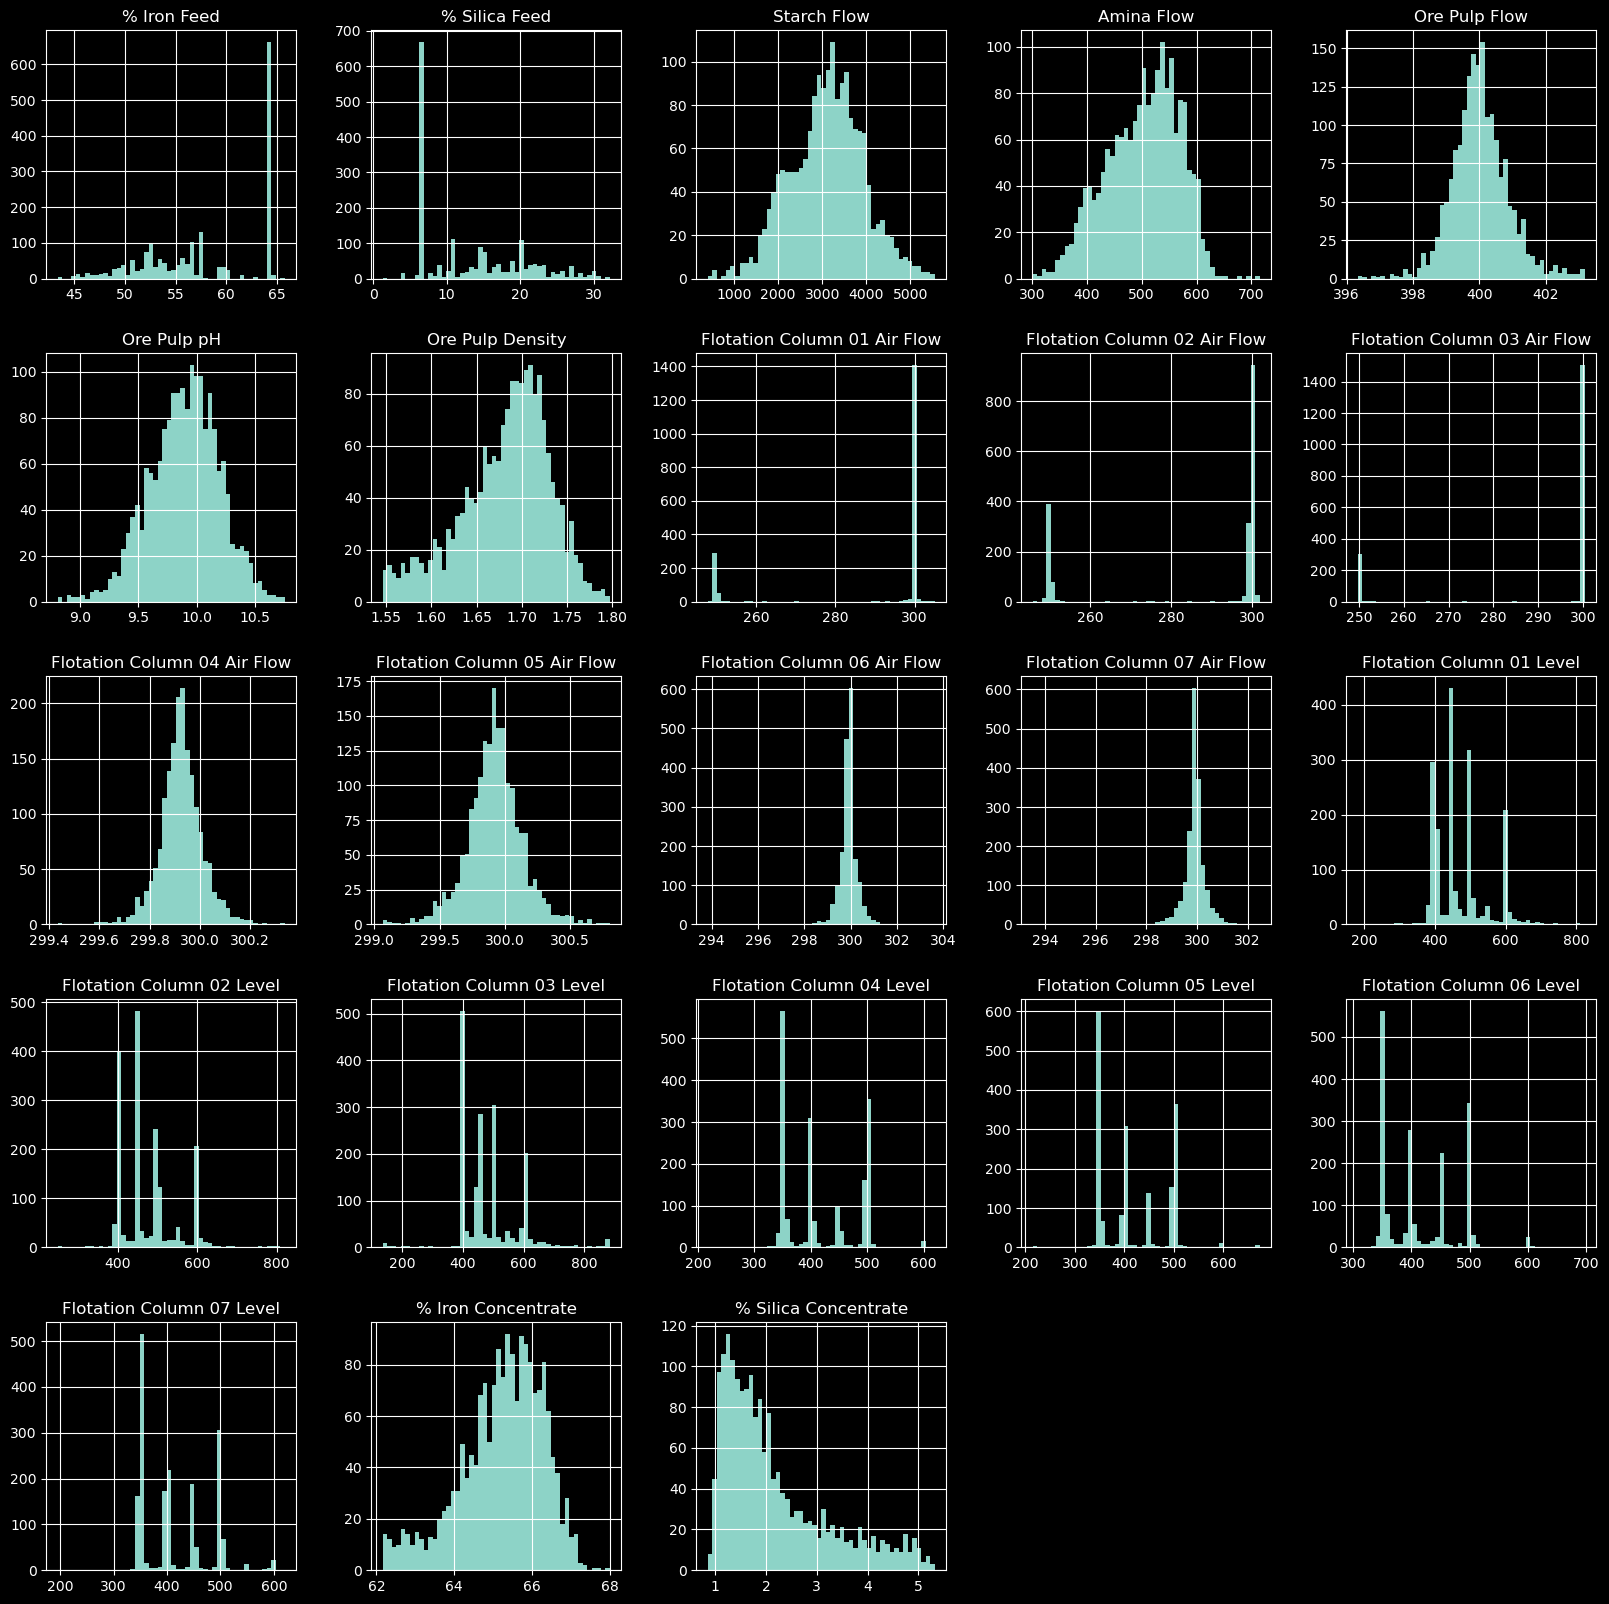

In [30]:
df.hist(bins=50,figsize=(20,20))

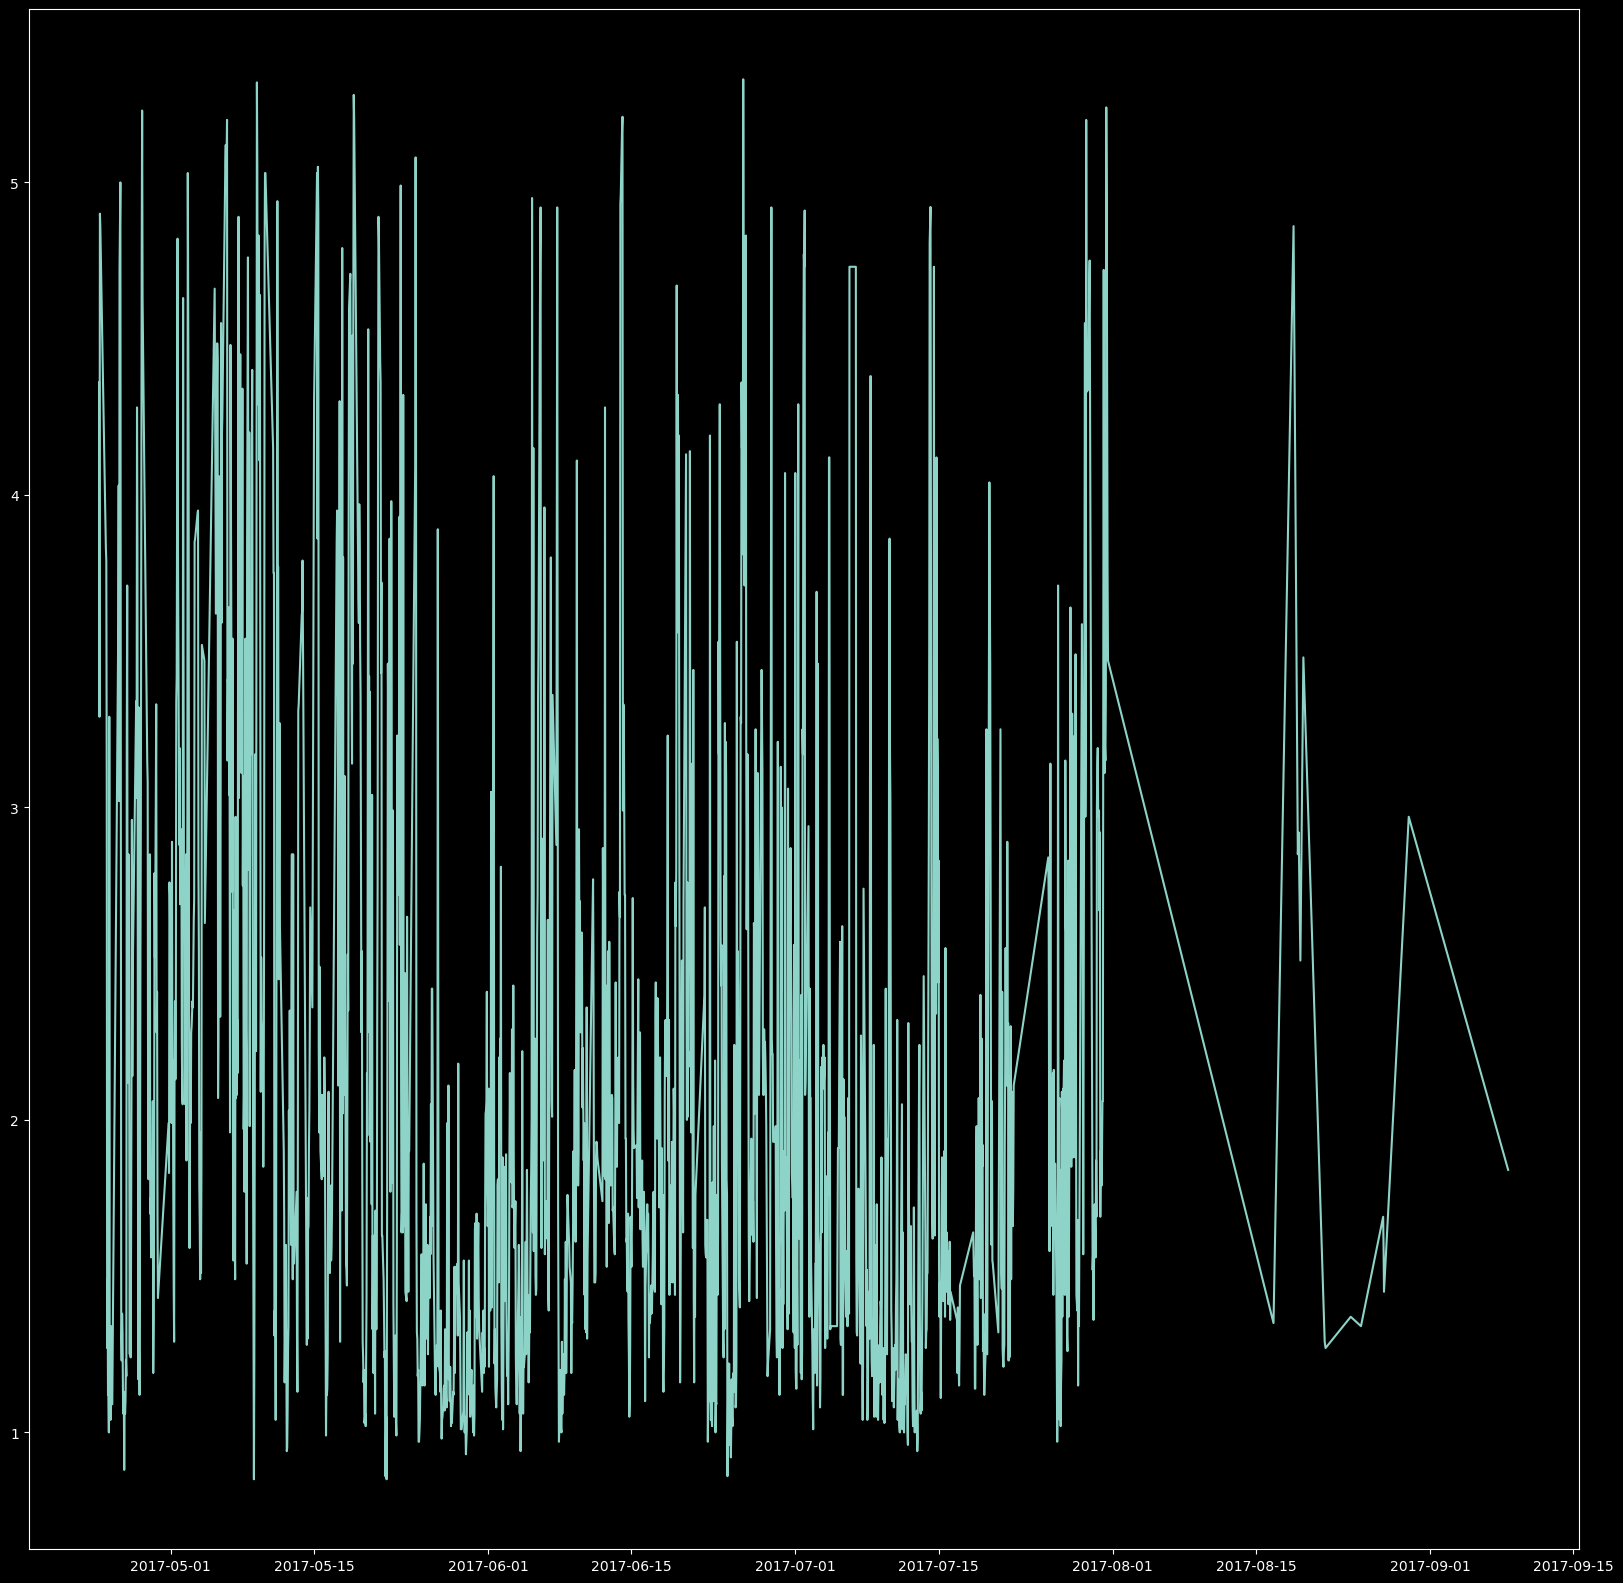

In [31]:
plt.figure(figsize=(20,20))
plt.plot(df["% Silica Concentrate"])

<AxesSubplot:>

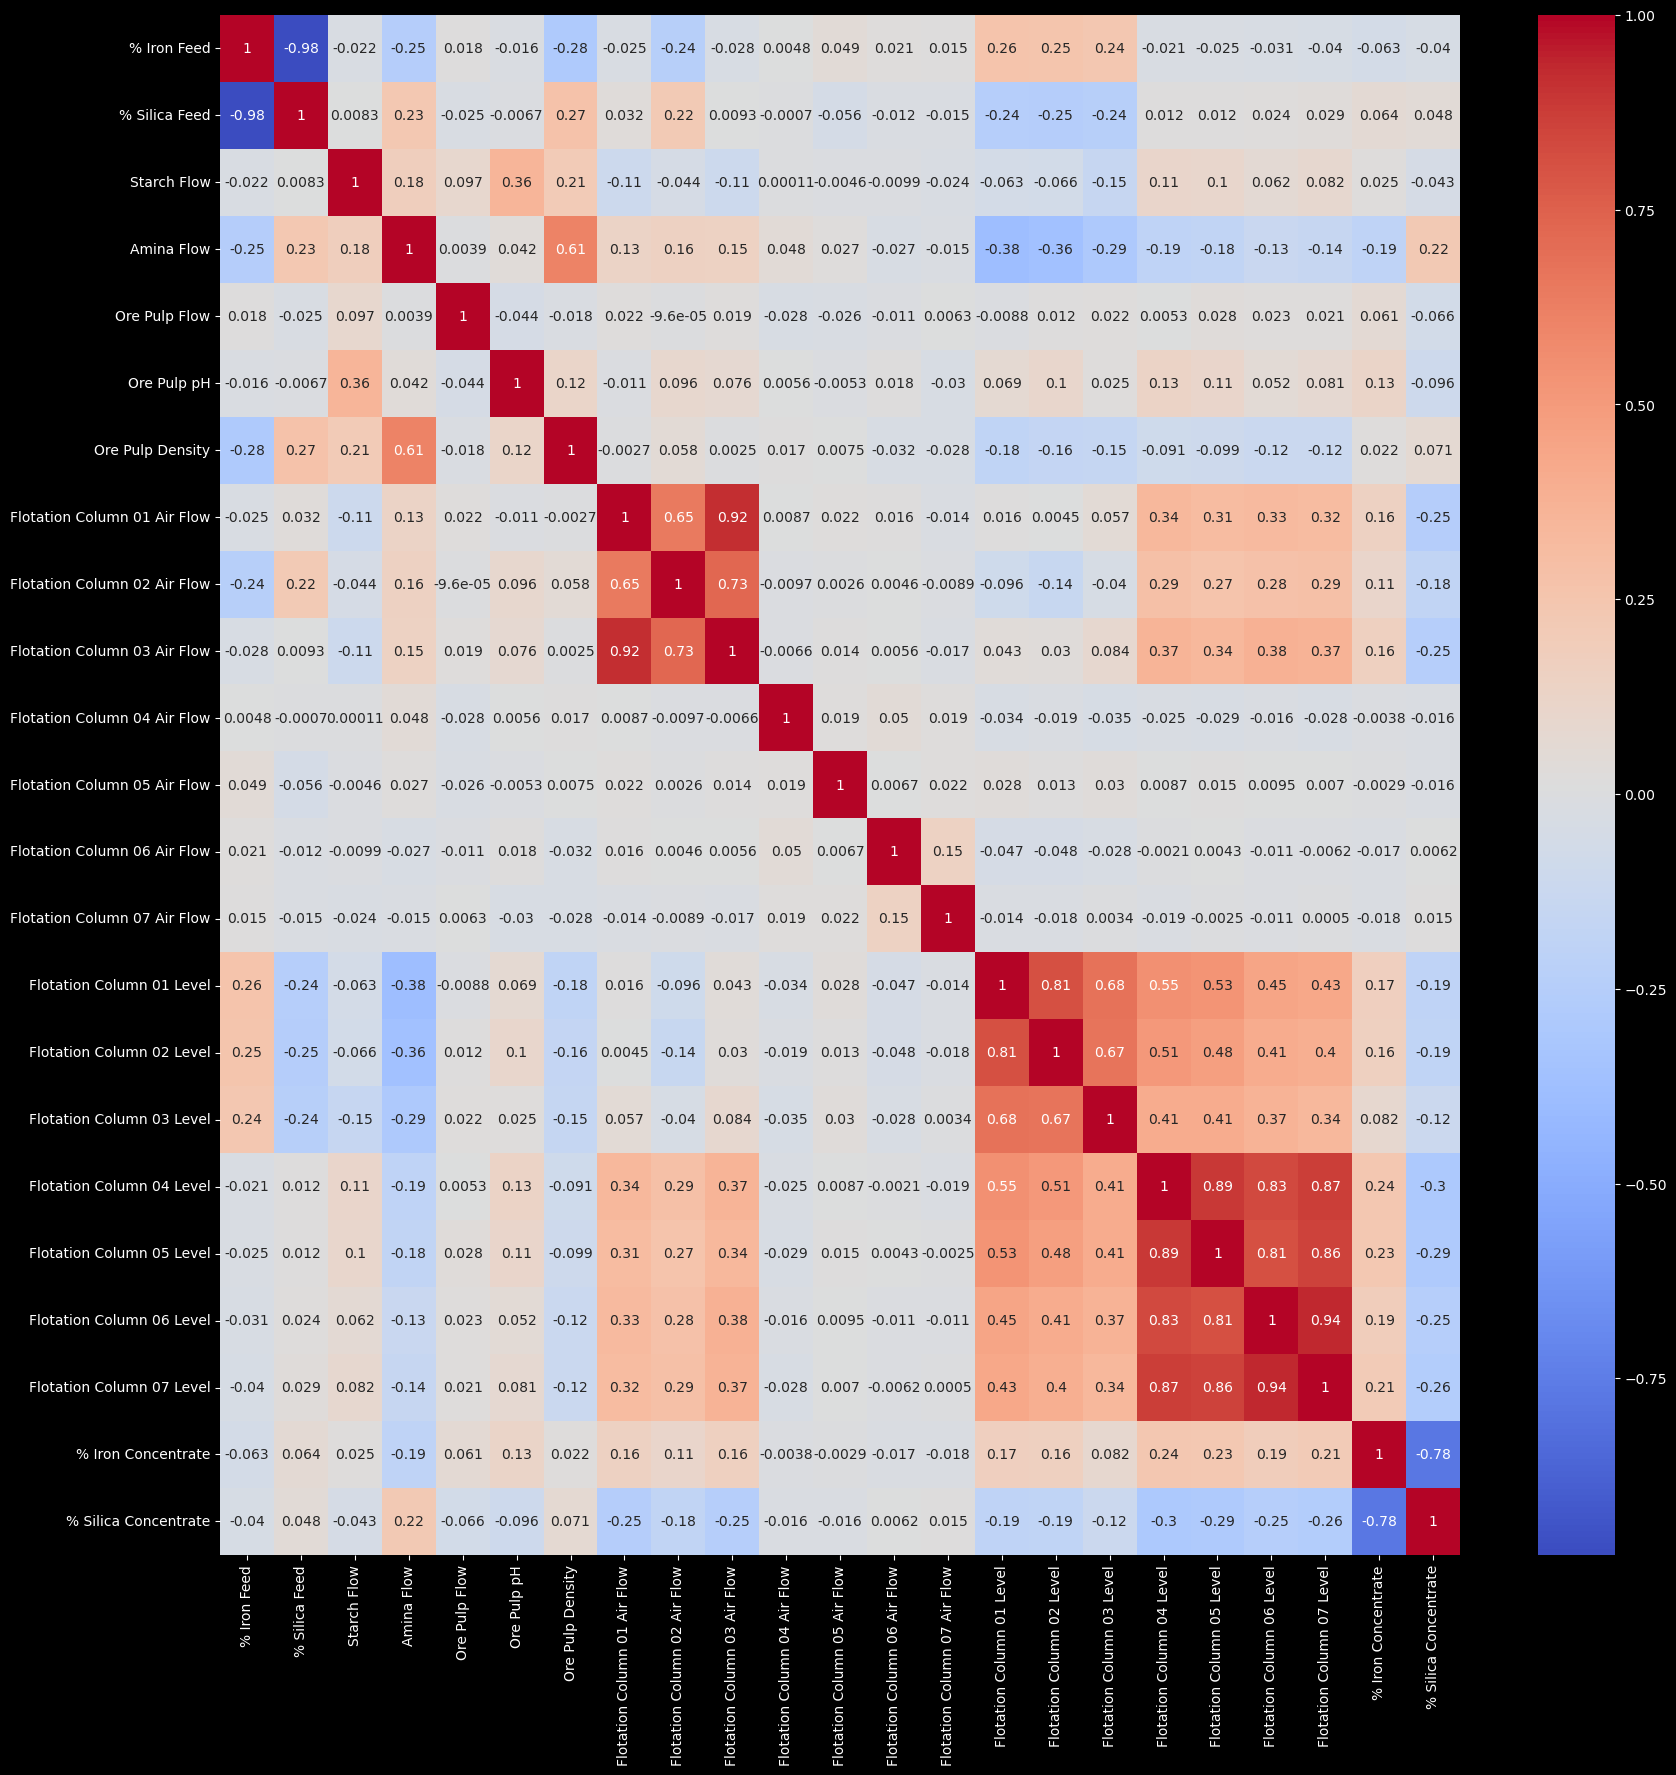

In [32]:
# Heatmap
heat_map = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(heat_map,annot=True,cmap='coolwarm')

Problem Statement 2: How many steps (hours) ahead can we predict % Silica in Concentrate?

In [33]:
df.shape

(1817, 23)

Hence, their are 1817 rows in dataframe. So, that means we are going to predict % Silica Concentrate in 1817 hours, which is around 75 days (2.5 months).

Therefore, Thats mean we are going to predict the % Silica Concentrate for 1817 hours after resampling, filtering and removing null or unused datas.

# Removal of Highly Correlated Columns (Features)

Problem Statement 3: Is it possible to predict % Silica in Concentrate without using % Iron Concentrate column (as they are highly correlated)?

Now, We are going to predict % Silica in Concentrate without using % Iron Concentrate column because this feature is highly correlated to the % Silica Concentrate and with this feature it gonna be too easy to predict target variable. 

So, we remove this feature from dataframe and with the help of other remaining features we predict out our 'Target Variable' (% Silica Concentrate).

In [34]:
df.drop('% Iron Concentrate', axis=1, inplace=True)

In [35]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,,,,,,
2017-04-24 00:00:00,55.17,14.35,1979.589150,599.676489,400.017222,9.774028,1.753207,300.109300,300.901444,299.883733,...,299.671711,300.733317,402.595967,402.549950,399.516933,349.834428,348.553772,345.280600,347.704244,4.360000
2017-04-24 01:00:00,55.17,14.35,1758.466329,600.043100,400.484528,9.539246,1.754190,299.757111,299.214672,299.929094,...,300.593706,299.319494,402.545111,399.410594,399.674333,355.927761,351.874317,349.989950,347.944433,3.290000
2017-04-24 02:00:00,55.17,14.35,2379.752428,599.948406,400.325617,9.434227,1.756873,299.872761,299.729817,299.835733,...,299.927450,299.060761,400.083206,399.026311,399.765017,355.904583,357.515550,348.050917,353.738850,4.900000
2017-04-24 03:00:00,55.17,14.35,2287.130046,599.580383,399.801506,9.725607,1.727125,299.918867,300.586722,300.042850,...,299.986806,299.560728,409.394728,399.476389,400.777272,358.734556,352.760539,348.476906,349.539900,4.860153
2017-04-24 04:00:00,55.17,14.35,2291.789167,599.871217,399.567333,9.845198,1.633063,299.939656,300.168350,299.933978,...,300.186650,300.130517,411.753339,397.899011,398.965794,352.713289,350.575167,352.587061,350.346294,4.780898


So, Column or Feature % Silica Concentrate is dropped from the dataframe.

In [36]:
corr_matrix = df.corr().abs()
corr_matrix

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
% Iron Feed,1.000000,0.976597,0.022178,0.254767,0.017732,0.015747,0.283548,0.025273,0.241947,0.027963,...,0.020704,0.015204,0.260918,0.252140,0.242017,0.021219,0.024799,0.030638,0.039928,0.040238
% Silica Feed,0.976597,1.000000,0.008324,0.230906,0.024550,0.006730,0.266637,0.032089,0.219133,0.009263,...,0.011932,0.014999,0.244461,0.250947,0.237591,0.012287,0.012165,0.024293,0.028751,0.048264
Starch Flow,0.022178,0.008324,1.000000,0.177845,0.096631,0.355153,0.208843,0.105424,0.044500,0.105577,...,0.009925,0.023937,0.063201,0.066185,0.146021,0.106448,0.100563,0.062455,0.082284,0.042897
Amina Flow,0.254767,0.230906,0.177845,1.000000,0.003927,0.041634,0.610035,0.127717,0.158209,0.149886,...,0.027053,0.015151,0.382257,0.364471,0.289532,0.193601,0.179068,0.134967,0.144776,0.221256
Ore Pulp Flow,0.017732,0.024550,0.096631,0.003927,1.000000,0.044442,0.017665,0.021543,0.000096,0.019431,...,0.010901,0.006345,0.008754,0.012223,0.022302,0.005272,0.028200,0.022526,0.021374,0.066118
Ore Pulp pH,0.015747,0.006730,0.355153,0.041634,0.044442,1.000000,0.118388,0.011320,0.096369,0.076205,...,0.018490,0.030146,0.068843,0.104018,0.024593,0.128472,0.110536,0.051670,0.081034,0.096402
Ore Pulp Density,0.283548,0.266637,0.208843,0.610035,0.017665,0.118388,1.000000,0.002672,0.057723,0.002530,...,0.032337,0.028478,0.182358,0.158673,0.154722,0.090518,0.098571,0.123691,0.124650,0.070763
Flotation Column 01 Air Flow,0.025273,0.032089,0.105424,0.127717,0.021543,0.011320,0.002672,1.000000,0.651962,0.919392,...,0.016420,0.013934,0.016056,0.004510,0.057438,0.337002,0.314091,0.326267,0.318525,0.251786
Flotation Column 02 Air Flow,0.241947,0.219133,0.044500,0.158209,0.000096,0.096369,0.057723,0.651962,1.000000,0.728824,...,0.004625,0.008898,0.095793,0.142688,0.039952,0.288236,0.265137,0.278057,0.288163,0.179439
Flotation Column 03 Air Flow,0.027963,0.009263,0.105577,0.149886,0.019431,0.076205,0.002530,0.919392,0.728824,1.000000,...,0.005621,0.017431,0.042548,0.029785,0.083598,0.365432,0.340481,0.380674,0.372968,0.250206


In [37]:
# Upper triangle of the corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

drop_cols = []

for col in upper.columns:
    if any(upper[col] > 0.75):
        drop_cols.append(col)


In [38]:
drop_cols

['% Silica Feed',
 'Flotation Column 03 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Level',
 'Flotation Column 07 Level']

In [39]:
# Drop all these above columns
df.drop(df[drop_cols], axis=1, inplace=True)
df.head()

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 03 Level,Flotation Column 04 Level,% Silica Concentrate
Date_Time,,,,,,,,,,,,,,,,
2017-04-24 00:00:00,55.17,1979.589150,599.676489,400.017222,9.774028,1.753207,300.109300,300.901444,300.114594,300.048628,299.671711,300.733317,402.595967,399.516933,349.834428,4.360000
2017-04-24 01:00:00,55.17,1758.466329,600.043100,400.484528,9.539246,1.754190,299.757111,299.214672,300.031056,299.778372,300.593706,299.319494,402.545111,399.674333,355.927761,3.290000
2017-04-24 02:00:00,55.17,2379.752428,599.948406,400.325617,9.434227,1.756873,299.872761,299.729817,299.914944,299.994578,299.927450,299.060761,400.083206,399.765017,355.904583,4.900000
2017-04-24 03:00:00,55.17,2287.130046,599.580383,399.801506,9.725607,1.727125,299.918867,300.586722,299.857311,300.074700,299.986806,299.560728,409.394728,400.777272,358.734556,4.860153
2017-04-24 04:00:00,55.17,2291.789167,599.871217,399.567333,9.845198,1.633063,299.939656,300.168350,299.958933,299.647217,300.186650,300.130517,411.753339,398.965794,352.713289,4.780898


# Feature Enginnering

Now, Let's take an average of the features like 'Flotation Air Flow' and 'Flotation Level' by which we get the mean value of that particular feature and number of columns is also reduced from the dataframe.

In [40]:
# Average of 'Flotation Air Flow'
df['Avg_Flot_Air_Flow'] = df[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow',
                             'Flotation Column 04 Air Flow','Flotation Column 05 Air Flow',
                             'Flotation Column 06 Air Flow','Flotation Column 07 Air Flow']].mean(axis=1)
# Average of 'Flotation Level'
df['Avg_Flot_Lvl'] = df[['Flotation Column 01 Level','Flotation Column 03 Level',
                        'Flotation Column 04 Level']].mean(axis=1)

# Drop the all previous cols 'Flotation Air Flow' and 'Flotation Level'
df.drop(['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow',
        'Flotation Column 04 Air Flow','Flotation Column 05 Air Flow',
        'Flotation Column 06 Air Flow','Flotation Column 07 Air Flow',
        'Flotation Column 01 Level','Flotation Column 03 Level',
         'Flotation Column 04 Level'], axis=1, inplace=True)

In [41]:
df.head()

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate,Avg_Flot_Air_Flow,Avg_Flot_Lvl
Date_Time,,,,,,,,,
2017-04-24 00:00:00,55.17,1979.589150,599.676489,400.017222,9.774028,1.753207,4.360000,300.263166,383.982443
2017-04-24 01:00:00,55.17,1758.466329,600.043100,400.484528,9.539246,1.754190,3.290000,299.782402,386.049069
2017-04-24 02:00:00,55.17,2379.752428,599.948406,400.325617,9.434227,1.756873,4.900000,299.750052,385.250935
2017-04-24 03:00:00,55.17,2287.130046,599.580383,399.801506,9.725607,1.727125,4.860153,299.997522,389.635519
2017-04-24 04:00:00,55.17,2291.789167,599.871217,399.567333,9.845198,1.633063,4.780898,300.005220,387.810807


As we add new columns to dataframe they'll often start to get large and the columns may appear in an order that no longer makes sense. To make our dataframe easier to read, we'll often need to reorder the columns and rearrange them into a specific order.

In [42]:
#Reordering
cols = df.columns.to_list()
order = cols[-2:]+cols[:-2]
df = df[order]

In [43]:
df.head()

,Avg_Flot_Air_Flow,Avg_Flot_Lvl,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate
Date_Time,,,,,,,,,
2017-04-24 00:00:00,300.263166,383.982443,55.17,1979.589150,599.676489,400.017222,9.774028,1.753207,4.360000
2017-04-24 01:00:00,299.782402,386.049069,55.17,1758.466329,600.043100,400.484528,9.539246,1.754190,3.290000
2017-04-24 02:00:00,299.750052,385.250935,55.17,2379.752428,599.948406,400.325617,9.434227,1.756873,4.900000
2017-04-24 03:00:00,299.997522,389.635519,55.17,2287.130046,599.580383,399.801506,9.725607,1.727125,4.860153
2017-04-24 04:00:00,300.005220,387.810807,55.17,2291.789167,599.871217,399.567333,9.845198,1.633063,4.780898


<AxesSubplot:>

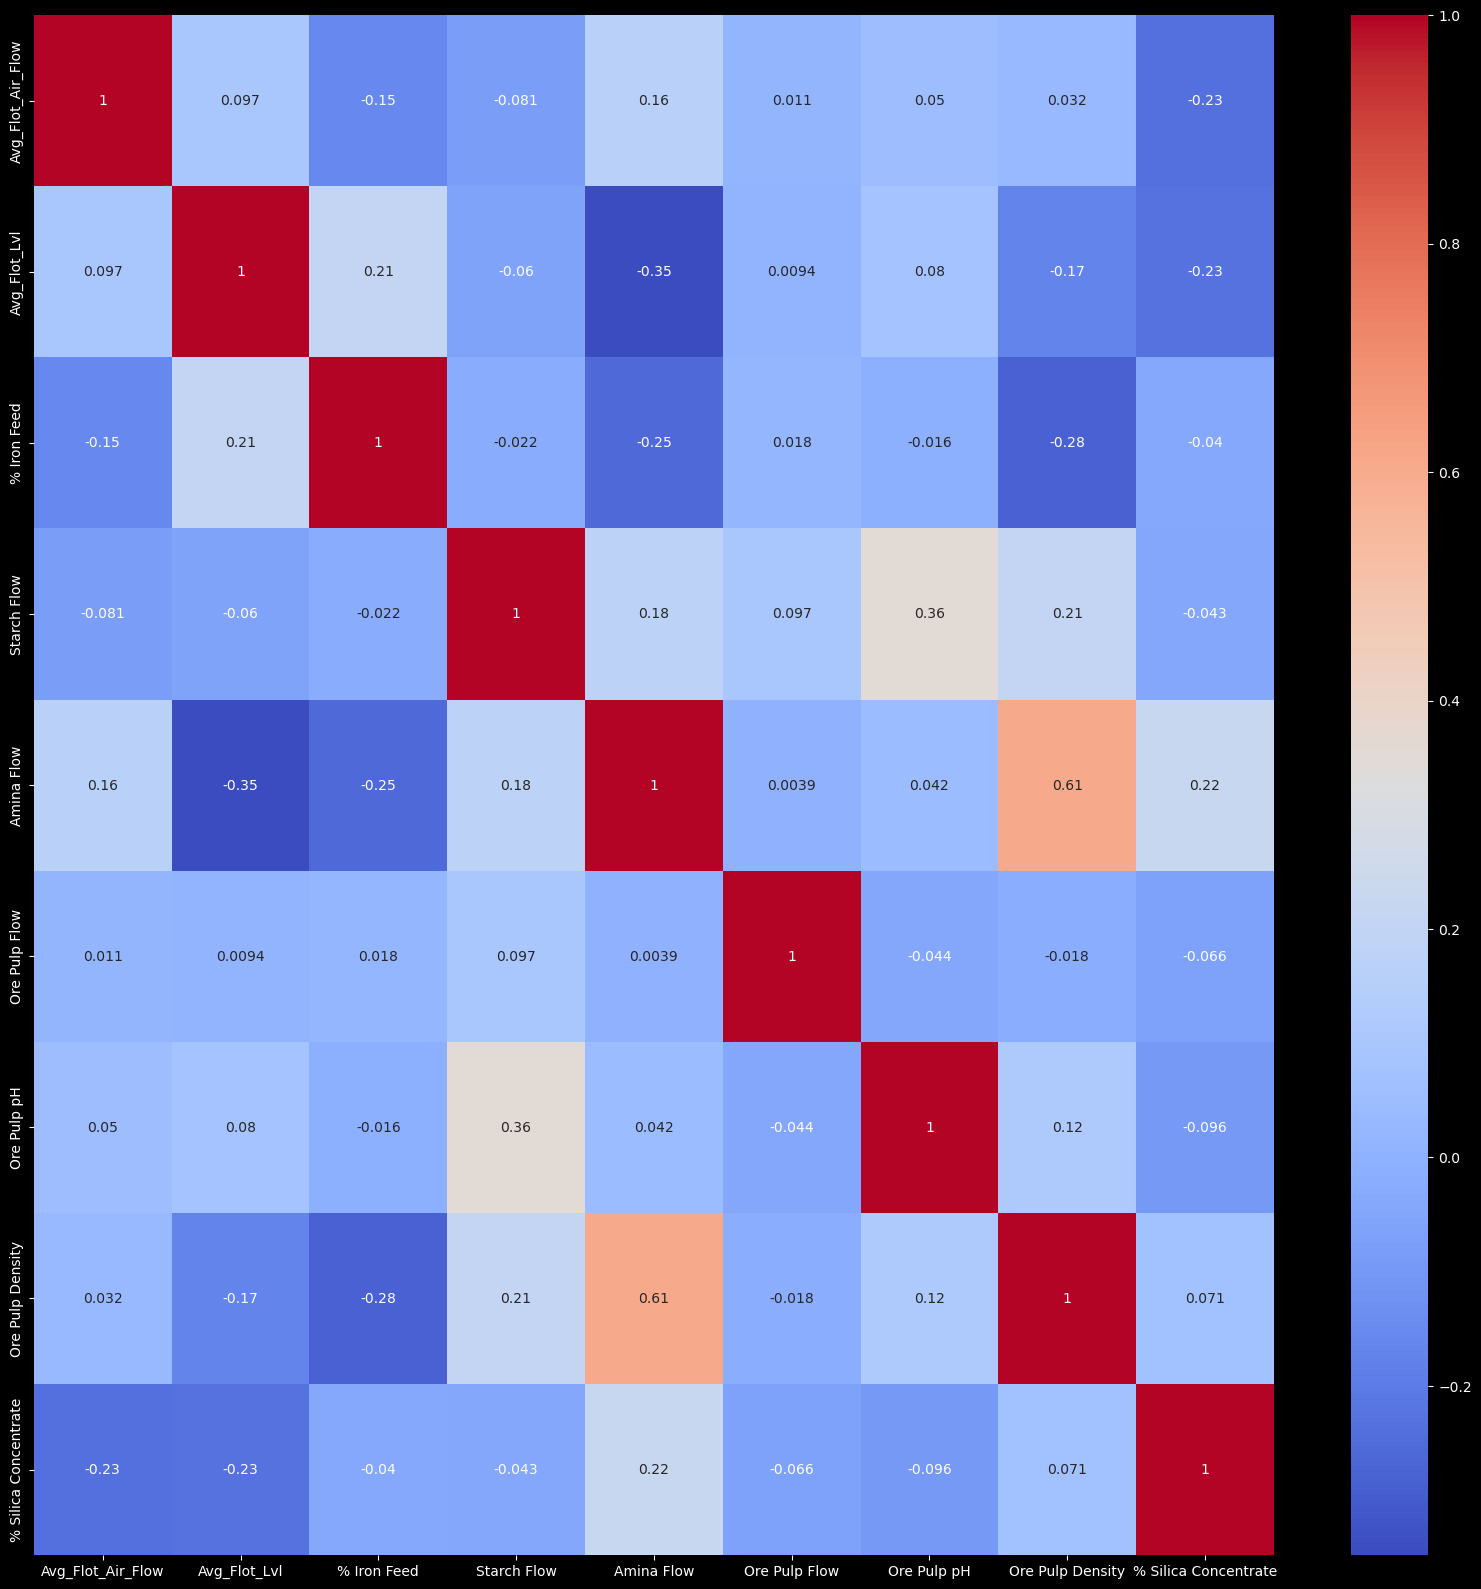

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

array([[<AxesSubplot:title={'center':'Avg_Flot_Air_Flow'}>,
        <AxesSubplot:title={'center':'Avg_Flot_Lvl'}>,
        <AxesSubplot:title={'center':'% Iron Feed'}>],
       [<AxesSubplot:title={'center':'Starch Flow'}>,
        <AxesSubplot:title={'center':'Amina Flow'}>,
        <AxesSubplot:title={'center':'Ore Pulp Flow'}>],
       [<AxesSubplot:title={'center':'Ore Pulp pH'}>,
        <AxesSubplot:title={'center':'Ore Pulp Density'}>,
        <AxesSubplot:title={'center':'% Silica Concentrate'}>]],
      dtype=object)

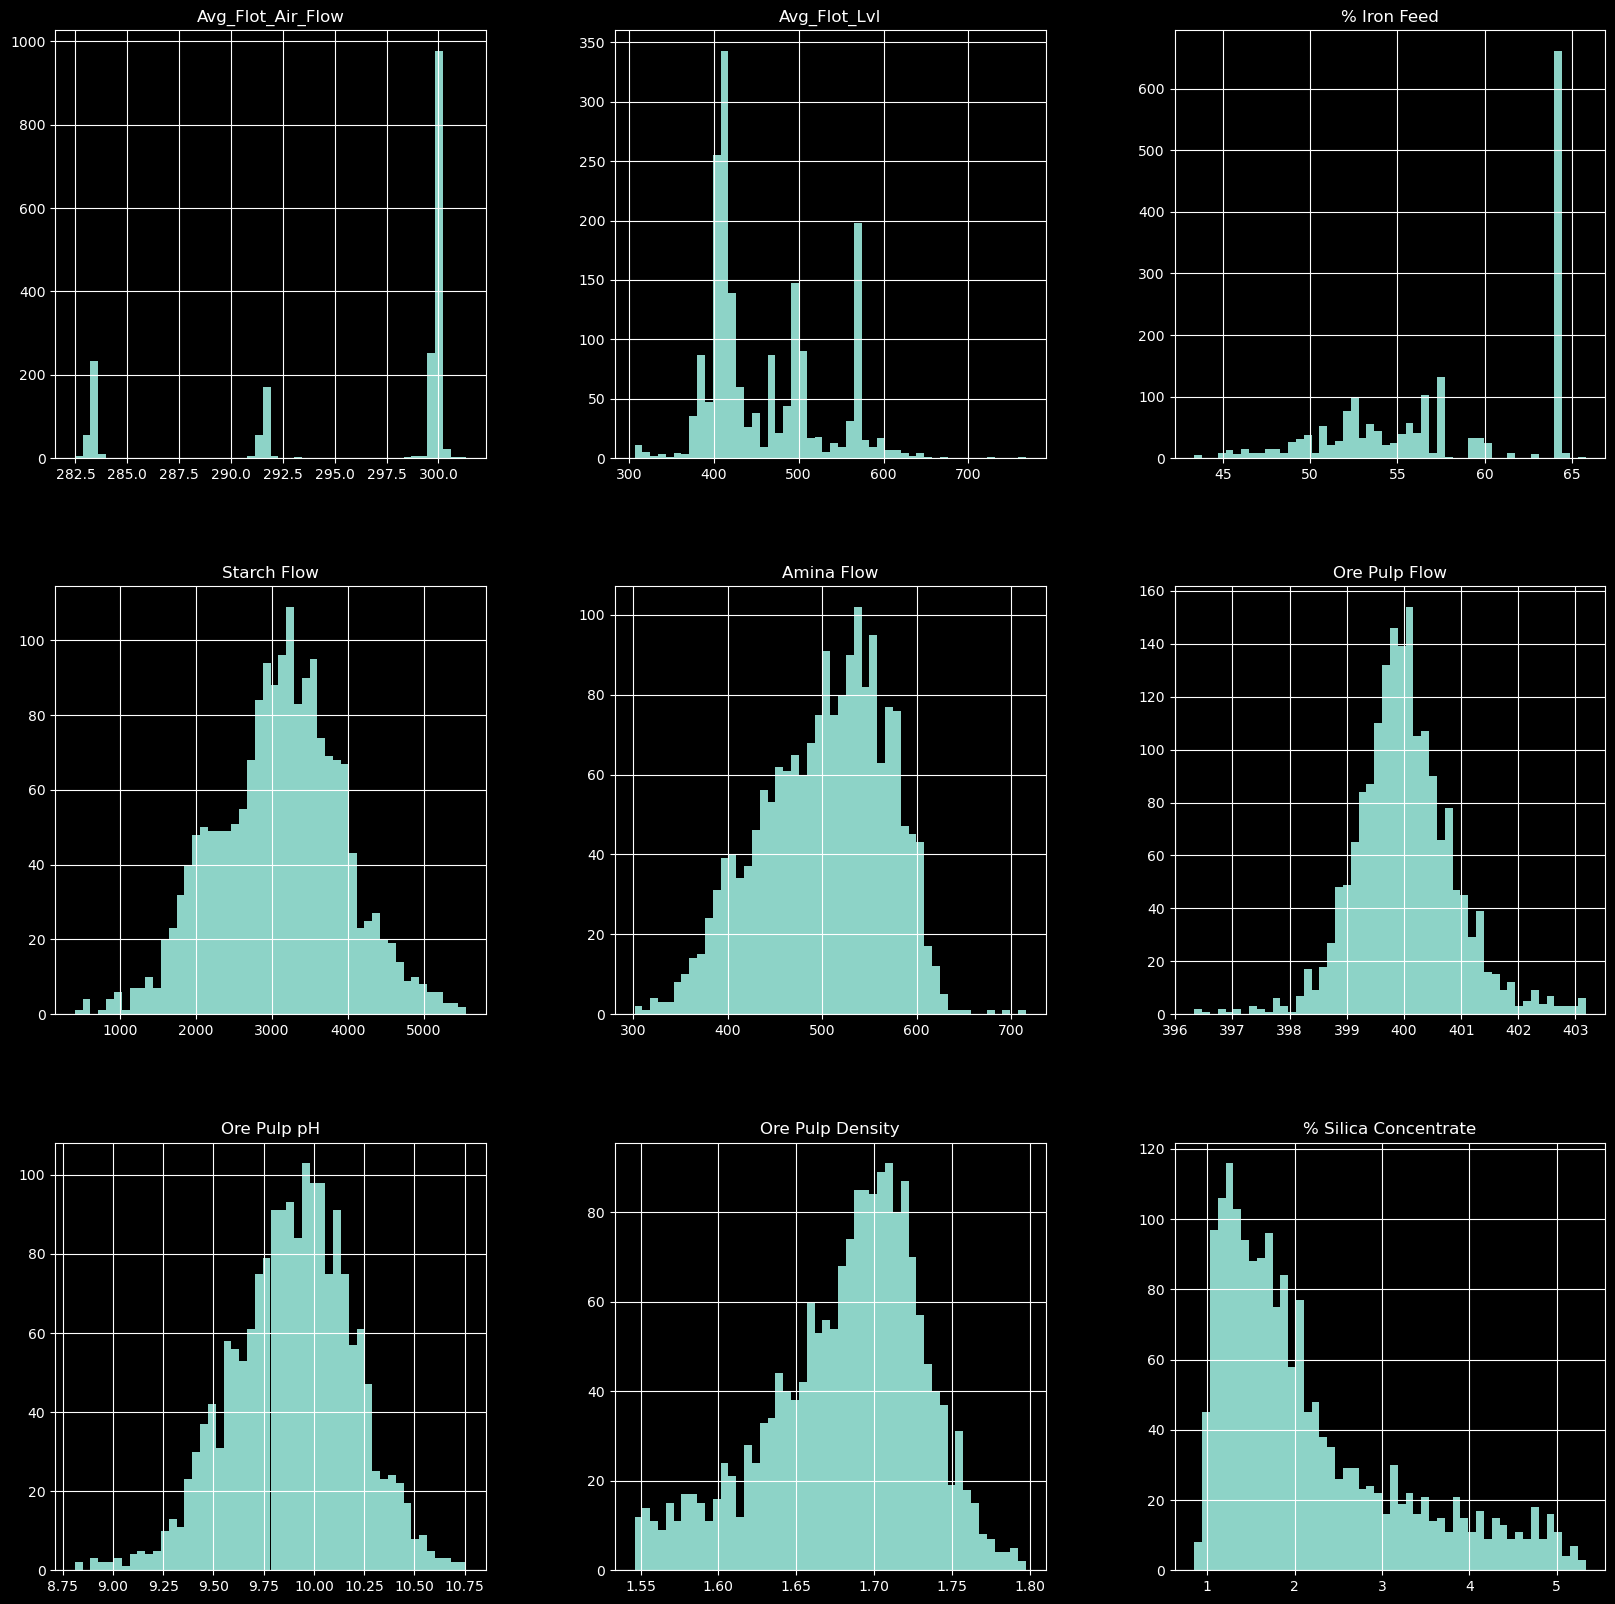

In [45]:
df.hist(bins=50, figsize=(20,20))

# Machine Learning Model

Importing Libraries:

In [47]:
# Train and test, Pipeline and Standard scaler packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Training and Testing Data/Spliting Data into Training and Testing

In [48]:
arr = df.values

X = arr[:,:-1]
y = arr[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1271, 8)
X_test: (546, 8)
y_train: (1271,)
y_test: (546,)


Creating Pipelines:

In [50]:
pl_lr = Pipeline([('scaler',StandardScaler()) , ('Linear Regression',LinearRegression())])
pl_sgd = Pipeline([('scaler',StandardScaler()) , ('SGD Regression',SGDRegressor())])
pl_dt = Pipeline([('scaler',StandardScaler()) , ('DT Regression',DecisionTreeRegressor())])
pl_svr = Pipeline([('scaler',StandardScaler()) , ('SVR',SVR())])
pl_rfr = Pipeline([('scaler',StandardScaler()) , ('RFR',RandomForestRegressor())])
pl_gbr = Pipeline([('scaler',StandardScaler()) , ('GBR',GradientBoostingRegressor())])
pl_knn = Pipeline([('scaler',StandardScaler()) , ('KNN',KNeighborsRegressor())])

pls = [pl_lr, pl_sgd, pl_dt, pl_svr, pl_rfr, pl_gbr, pl_knn]

pls_dict = {0:'Linear Regression', 1:'SGD Regression', 2:'DT Regression',
            3:'SVR', 4:'RFR', 5:'GBR', 6:'KNN'}

Cross Validation and KFold

Cross Validation: Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.

KFold: K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes.

In [51]:
# Import packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
std = []

for idx,val in enumerate(pls):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_scores = cross_val_score(val, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    scores.append(rmse_scores.mean())
    std.append(rmse_scores.std())
    print('{0}{1}: {2:.3f} ({3:.3f})'.format(pls_dict[idx], ' RMSE Score', scores[idx], std[idx]))

Linear Regression RMSE Score: 0.970 (0.074)
SGD Regression RMSE Score: 0.970 (0.075)
DT Regression RMSE Score: 1.334 (0.109)
SVR RMSE Score: 0.986 (0.080)
RFR RMSE Score: 0.941 (0.063)
GBR RMSE Score: 0.950 (0.065)
KNN RMSE Score: 0.992 (0.091)


So, From above observation we saw that 'Random Forest Regression' algorithm perform best when we scaled the data.

Hence, we create our model using Random Forest Regression Algorithm.

# Test Data for Validate Model

In [52]:
scaler = StandardScaler().fit(X_train)
X_tr_scale = scaler.transform(X_train)
X_te_scale = scaler.transform(X_test)

rfr_model = RandomForestRegressor()
rfr_model.fit(X_tr_scale,y_train)

RandomForestRegressor()

In [53]:
base_pred_y = rfr_model.predict(X_te_scale)
mse = metrics.mean_squared_error(y_test,base_pred_y)
rmse = np.sqrt(mse)
print('RMSE: {0:.3f}'.format(rmse))
print('R2: {0:.3f}'.format(rfr_model.score(X_te_scale,y_test)))

RMSE: 0.911
R2: 0.224


In [54]:
def evaluate(pred, test_data):
    errors = abs(pred - test_data)
    mape = 100*np.mean(errors / test_data)
    accuracy = 100 - mape
    print("Performance of the Model\n")
    print("Accuracy Error: {0:.3f}".format(np.mean(errors)))
    print("Accuracy of the Model: {0:.3f}%".format(accuracy))
    return accuracy

In [55]:
base_accuracy = evaluate(base_pred_y,y_test)

Performance of the Model

Accuracy Error: 0.707
Accuracy of the Model: 62.358%


# Model Tuning Using GridSearchCV 

Model tuning is the experimental process of finding the optimal values of hyperparameters to maximize model performance. Hyperparameters are the set of variables whose values cannot be estimated by the model from the training data. These values control the training process.

In [56]:
from sklearn.model_selection import GridSearchCV

grid_para = {'max_depth': [50,250,500], 'n_estimators': [210,230,250]}

model = RandomForestRegressor(random_state=42)

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
grid_search = GridSearchCV(model, grid_para, cv=kfold, scoring='neg_mean_squared_error')
grid_search.fit(X_tr_scale,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [50, 250, 500],
                         'n_estimators': [210, 230, 250]},
             scoring='neg_mean_squared_error')

In [57]:
grid_search.best_params_

{'max_depth': 50, 'n_estimators': 230}

In [58]:
np.sqrt(-grid_search.best_score_)

0.9343386479618623

It receives a range of parameters as input and it finds the best ones based on the mean score as above. Grid search trains different models based on different combinations of the input parameters and finally returns the best model or the best estimator. Hence, best_score_ is the mean score of the best estimator.

# Final Validation of Model based on Best Estimator which we found in above GridSearchCV

In [59]:
Final_model = grid_search.best_estimator_
Final_model.fit(X_tr_scale,y_train)

final_pred_y = Final_model.predict(X_te_scale)
final_mse = metrics.mean_squared_error(y_test,final_pred_y)
final_rmse = np.sqrt(metrics.mean_squared_error(y_test,final_pred_y))
print('RMSE: {0:.3f}'.format(final_rmse))
print('R2: {0:.3f}'.format(Final_model.score(X_te_scale,y_test)))

RMSE: 0.900
R2: 0.243


In [60]:
final_accuracy = evaluate(final_pred_y,y_test)

Performance of the Model

Accuracy Error: 0.696
Accuracy of the Model: 62.786%


In [61]:
print('Improvement of {0:.2f}%'.format((final_accuracy-base_accuracy)))

Improvement of 0.43%


In [62]:
differ = pd.DataFrame({"Prediction":final_pred_y,"Test Data":y_test})
differ.head(10)

,Prediction,Test Data
0,1.683978,2.05
1,1.386783,0.99
2,2.431039,2.93
3,2.467335,4.79
4,1.786543,1.69
5,2.591283,1.85
6,2.986594,2.09
7,1.535173,1.08
8,2.149575,1.19
9,1.706870,1.64


Random Forest Regression Model Performance

Text(0, 0.5, 'Y Prediction')

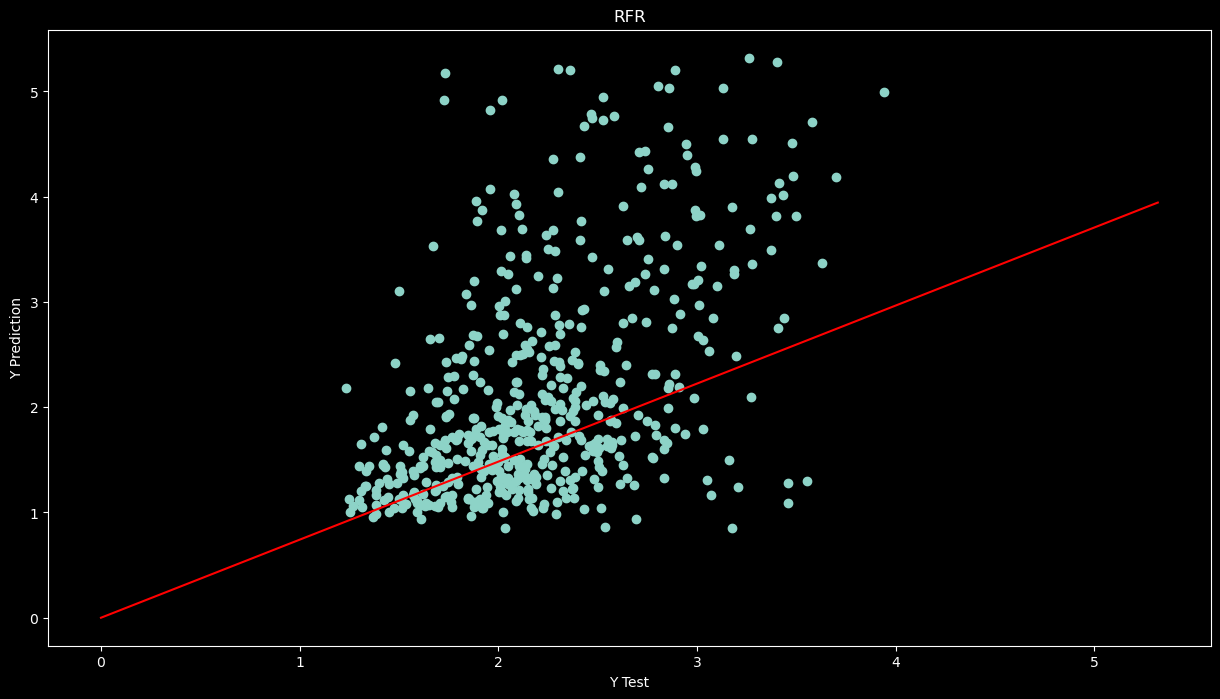

In [63]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(1,1,1)
axes.scatter(final_pred_y,y_test)
axes.plot([0,max(y_test)],[0,max(final_pred_y)],color='r')
axes.set_title('RFR')
axes.set_xlabel('Y Test')
axes.set_ylabel('Y Prediction')

Hence, Yes it is possible to predict % Silica Concentrate without using % Iron Concentrate feature.